# La regresión lineal es una técnica de aprendizaje automático que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. 

La idea detrás de la regresión lineal es encontrar la recta que mejor se ajusta a los datos y utilizar esa recta para hacer predicciones sobre la variable dependiente.

La recta se puede representar matemáticamente como:

y = b0 + b1*x1 + b2*x2 + ... + bn*xn

donde y es la variable dependiente, x1, x2, ..., xn son las variables independientes y b0, b1, b2, ..., bn son los coeficientes que se deben estimar a partir de los datos.

El objetivo de la regresión lineal es encontrar los valores óptimos de los coeficientes b0, b1, b2, ..., bn que minimicen el error entre las predicciones y los valores reales de la variable dependiente. Esto se puede hacer usando una técnica llamada mínimos cuadrados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns


import pandas as pd


In [2]:
# Cargar el conjunto de datos diabetes
diabetes = datasets.load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
db_df['Progression'] = diabetes.target

db_df.sample(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907,295.0
37,-0.009147,-0.044642,0.011039,-0.057313,-0.024960,-0.042963,0.030232,-0.039493,0.017036,-0.005220,276.0


In [5]:
corr = db_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


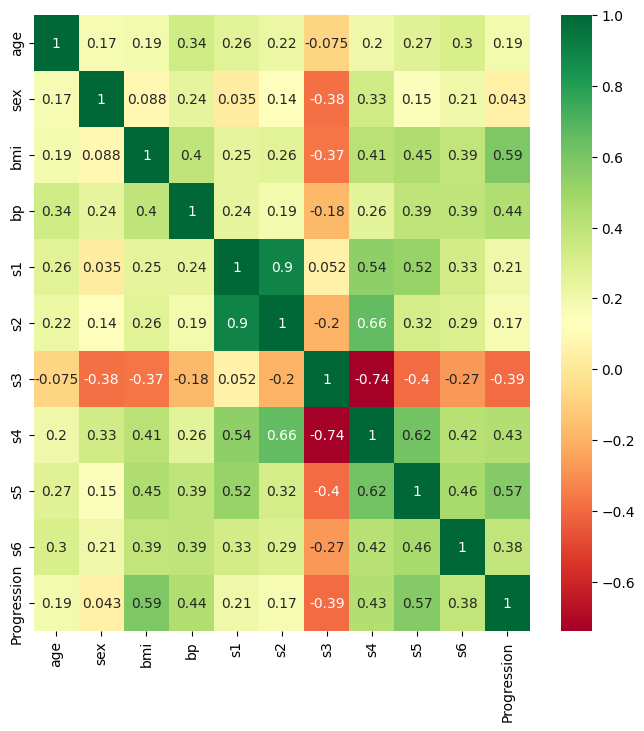

In [6]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

In [7]:
#independent variables / explanatory variables
x = db_df.drop(labels=['Progression'], axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = db_df['Progression']

#splitting the dataset into 75%-25% train-test split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=999)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [8]:
x.loc[ :,["age","bmi"]]

,age,bmi
0,0.038076,0.061696
1,-0.001882,-0.051474
2,0.085299,0.044451
3,-0.089063,-0.011595
4,0.005383,-0.036385
...,...,...
437,0.041708,0.019662
438,-0.005515,-0.015906
439,0.041708,-0.015906
440,-0.045472,0.039062


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [10]:
lm.fit(train_x, train_y)

LinearRegression()

In [11]:
predicted_y = lm.predict(test_x)

In [12]:
from sklearn import metrics as mt

In [13]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))

1) The model explains, 57.57 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 38.08
3) The R-Square score of the model is  0.56


In [14]:
lm.score(test_x, test_y)

0.5594160224022493

In [15]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(diabetes.data)

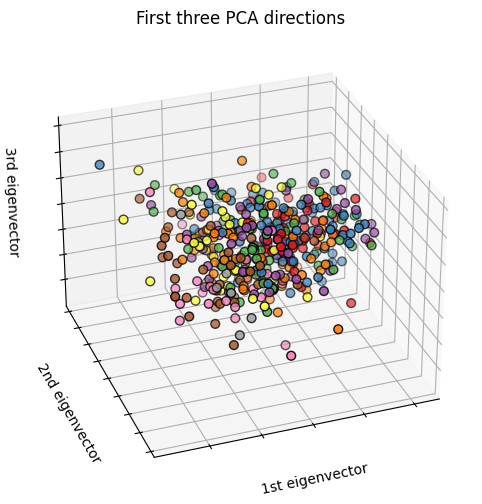

In [16]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [17]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Create a PCA object
pca = PCA()

# Define a range of parameters to search for
param_grid = {'n_components': [4,5,6,7,8,9],
              'svd_solver': ['auto', 'full', 'arpack']}

# Create a grid search object
grid = GridSearchCV(pca, param_grid=param_grid)

# Fit the grid search to the data
grid.fit(train_x)

# The best parameters can be accessed as follows:
best_parameters = grid.best_params_

In [18]:
best_parameters

{'n_components': 9, 'svd_solver': 'auto'}

In [19]:
train_x.shape

(331, 10)

In [20]:
pca = PCA(n_components=9, svd_solver='auto')
pca.fit(train_x)

PCA(n_components=9)

In [21]:
train_x_pca = pca.transform(train_x)
test_x_pca  = pca.transform(test_x)

In [35]:
train_x.iloc[0,:], train_x_pca[0,:]

(age   -0.027310
 sex   -0.044642
 bmi    0.080019
 bp     0.098751
 s1    -0.002945
 s2     0.018101
 s3    -0.017629
 s4     0.003312
 s5    -0.029526
 s6     0.036201
 Name: 416, dtype: float64,
 array([ 0.04410884,  0.00088326,  0.05535613,  0.06613952,  0.03322567,
        -0.0662726 , -0.05144447,  0.06072767, -0.00086158]))

In [22]:
lm_pca = LinearRegression()
lm_pca.fit( train_x_pca , train_y)

LinearRegression()

In [23]:
predicted_y = lm_pca.predict(test_x_pca)

In [24]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))


1) The model explains, 58.44 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 37.42
3) The R-Square score of the model is  0.57


In [25]:
lm_pca.score(test_x_pca, test_y), lm.score(test_x, test_y)

(0.5681862888457535, 0.5594160224022493)

In [26]:
import numpy as np
np.square((test_y - predicted_y).mean()), test_y.std(),  test_y.mean() 

(83.33538405861754, 71.9426687296738, 137.2072072072072)

(array([11., 16., 15.,  7., 10.,  7.,  6.,  8.,  6.,  3.]),
 array([ 37. ,  64.3,  91.6, 118.9, 146.2, 173.5, 200.8, 228.1, 255.4,
        282.7, 310. ]),
 <BarContainer object of 10 artists>)

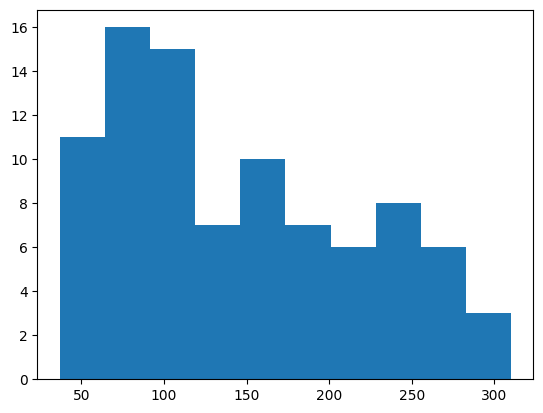

In [27]:
import matplotlib.pyplot as plt
plt.hist(y_test)